# **Customer Churn Prediction in Indian Telecom Industry**
Churn prediction means detecting which customers are likely to leave a service or cancel a subscription to a service.This project's primary goal is to predict customer churn, which refers to the loss of customers in  telecom industry.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import sufficient libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/drive/MyDrive/telecom_churn.csv")
df

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0


In [ ]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [ ]:
df.tail()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0
243552,243553,BSNL,F,37,Telangana,Hyderabad,139086,2023-05-04,0,144297,61,7,3384,0


In [ ]:
df.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

In [ ]:
#To print the diamension of the dataframe in (rows, columns) format
df.shape

(243553, 14)

In [ ]:
#To get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [ ]:
df.isna().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [ ]:
#To generate descriptive statistics of the dataframe
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


# **check or display the number of duplicate rows present**

In [ ]:
df.duplicated().sum()

0

# **check if the dataset is balanced or not**

In [ ]:
df['churn'].value_counts()

0    194726
1     48827
Name: churn, dtype: int64

In [ ]:
df['churn'].value_counts()/len(df['churn'])

0    0.799522
1    0.200478
Name: churn, dtype: float64

# **the data is highly imbalanced,ratio=79 ,to be balanced data has to be50:50**

<Axes: xlabel='churn', ylabel='count'>

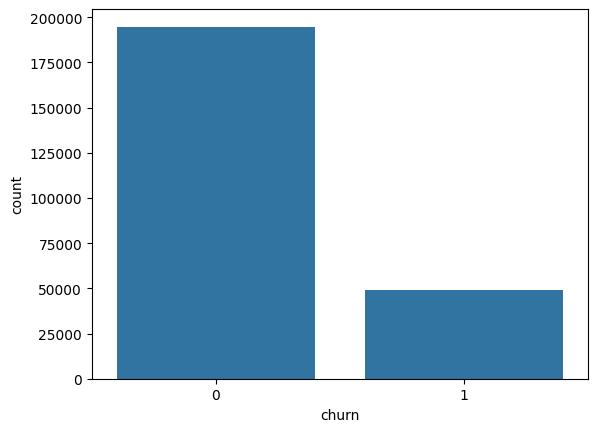

In [ ]:
sns.countplot(x='churn',data=df)

In [ ]:
tp=df['telecom_partner'].value_counts()
tp

Reliance Jio    61123
Airtel          60905
Vodafone        60802
BSNL            60723
Name: telecom_partner, dtype: int64

# **Churn percentage of telecom company**

Text(0.5, 1.0, 'Churn percentage of telecome company')

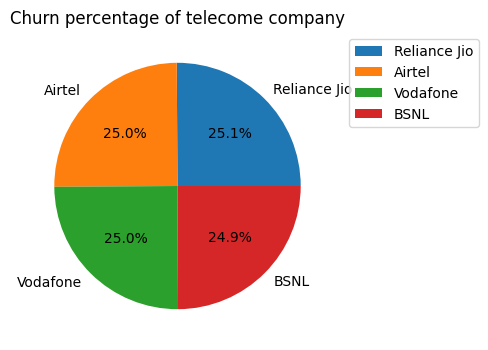

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(tp,labels=tp.index,autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.50,1),loc='best')
plt.title("Churn percentage of telecome company")

**Findings: All comppany have same share in case of churn customer**

# **Churn Percentage of Gender**

In [ ]:
gen=df['gender'].value_counts()
gen

M    145977
F     97576
Name: gender, dtype: int64

Text(0.5, 1.0, 'Churn percentage of Gender')

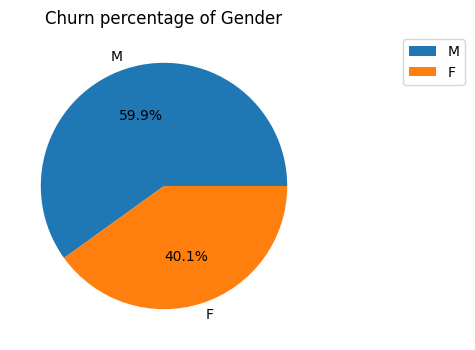

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(gen,labels=gen.index,autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.50,1),loc='best')
plt.title("Churn percentage of Gender")

**Finding:Male customers have high percentage in leaving**



# **Churn Percentage State vice**

In [ ]:
st=df['state'].value_counts()
st

Uttarakhand          8856
Karnataka            8845
Maharashtra          8820
Madhya Pradesh       8817
Arunachal Pradesh    8757
Jharkhand            8755
Rajasthan            8750
Uttar Pradesh        8742
Haryana              8740
Kerala               8725
Tamil Nadu           8718
Odisha               8712
Goa                  8694
Telangana            8689
Sikkim               8689
Mizoram              8689
Meghalaya            8684
Himachal Pradesh     8682
Chhattisgarh         8677
Tripura              8660
Manipur              8651
Andhra Pradesh       8649
Bihar                8633
Punjab               8628
Gujarat              8610
West Bengal          8572
Nagaland             8562
Assam                8547
Name: state, dtype: int64

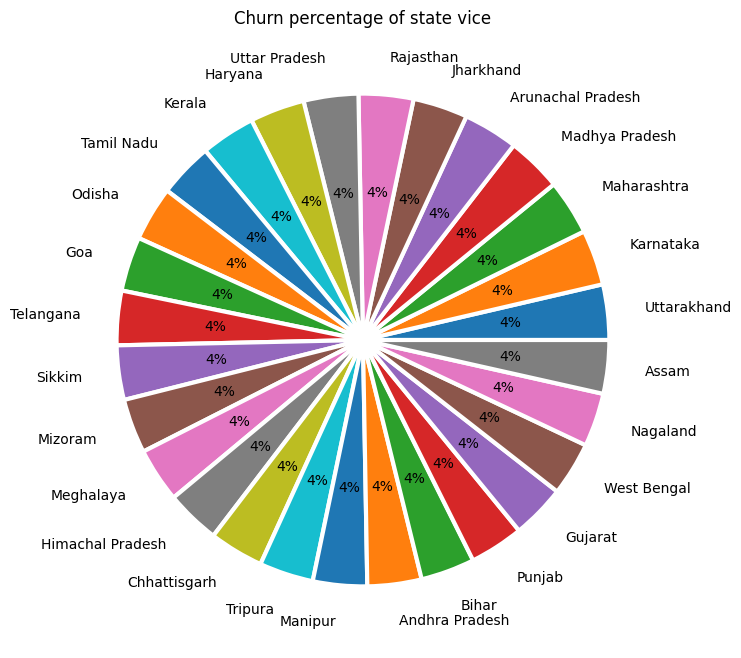

In [ ]:
plt.figure(figsize=(15,8))
plt.pie(st,labels=st.index,autopct="%1.f%%",labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Churn percentage of state vice")
plt.show()

# **Churn Percentage City vice**

In [ ]:
ct=df['city'].value_counts()
ct

Chennai      40749
Hyderabad    40698
Kolkata      40661
Bangalore    40603
Delhi        40456
Mumbai       40386
Name: city, dtype: int64

([<matplotlib.patches.Wedge at 0x7914596ff4f0>,
 [Text(0.9515133406570053, 0.5519260480823005, 'Chennai'),
  Text(-0.005952245219857377, 1.09998389568977, 'Hyderabad'),
  Text(-0.9568152219417289, 0.5426828088861856, 'Kolkata'),
  Text(-0.9478115254016286, -0.558259180234269, 'Bangalore'),
  Text(0.007782589031625808, -1.099972468431808, 'Delhi'),
  Text(0.9540872212001923, -0.5474646786254757, 'Mumbai')],
 [Text(0.5190072767220029, 0.3010505716812548, '16.7%'),
  Text(-0.003246679210831296, 0.5999912158307835, '16.7%'),
  Text(-0.5218992119682156, 0.2960088048470103, '16.7%'),
  Text(-0.5169881047645246, -0.30450500740051034, '16.7%'),
  Text(0.0042450485627049854, -0.5999849827809861, '16.6%'),
  Text(0.5204112115637413, -0.2986170974320776, '16.6%')])

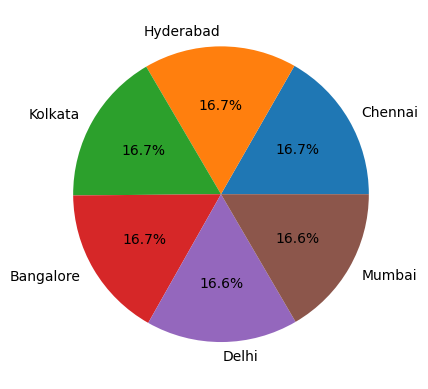

In [ ]:
plt.pie(ct,labels=ct.index,autopct='%.1f%%')

<Axes: xlabel='age', ylabel='Count'>

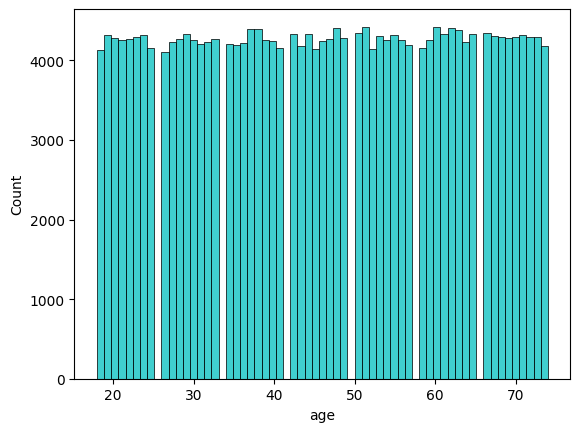

In [ ]:
age=df['age']
sns.histplot(age,color='c')

# **Churn Percentage by calls_made**

In [ ]:
churn_data_calls_made=df[df['churn']==1]['calls_made']
non_churn_calls_made=df[df['churn']==0]['calls_made']

churn_value_calls_made=list(churn_data_calls_made.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_calls_made.value_counts().sort_values())

Text(0.5, 1.0, 'Histplot calls made by churn customer')

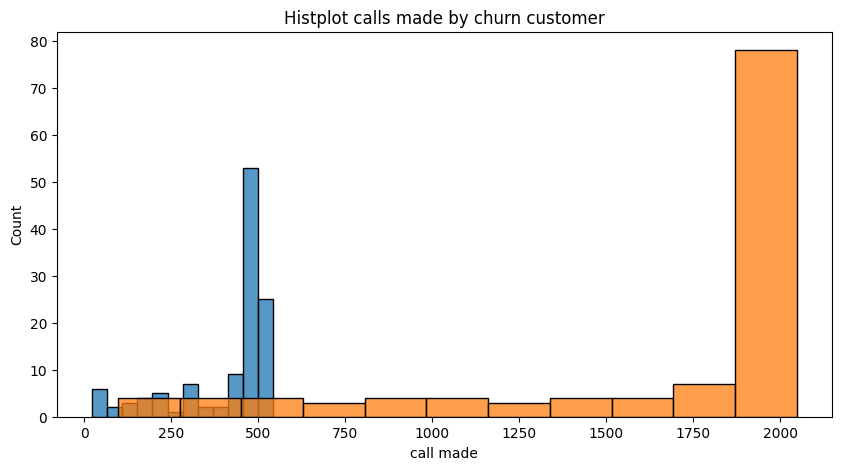

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(churn_value_calls_made)
sns.histplot(non_churn_value_calls_made)
plt.xlabel("call made")
plt.title("Histplot calls made by churn customer")

**findings :Non_Churn customer made higher calls than churn**

In [ ]:
dor=df['date_of_registration'].value_counts()
dor

2020-01-01    200
2022-02-12    200
2022-01-25    200
2022-01-27    200
2022-01-28    200
             ... 
2022-05-15    199
2020-10-12    199
2022-05-10    199
2020-10-17    199
2023-05-04      1
Name: date_of_registration, Length: 1220, dtype: int64

# **remove unwanted characters from date_of_reg coloumn**

In [ ]:
df['dor_day']=pd.to_datetime(df.date_of_registration,format="%Y/%m/%d").dt.day
df['dor_month']=pd.to_datetime(df.date_of_registration,format="%Y/%m/%d").dt.month
df['dor_year']=pd.to_datetime(df.date_of_registration,format="%Y/%m/%d").dt.year

In [ ]:
df

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,dor_day,dor_month,dor_year
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0,1,1,2020
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0,1,1,2020
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1,1,1,2020
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1,1,1,2020
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0,3,5,2023
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0,3,5,2023
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0,3,5,2023
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0,3,5,2023


In [ ]:
#drop unwanted columns
df=df.drop(['customer_id','pincode'],axis=1)

# **Encode the categorical columns**

In [ ]:
dfd=pd.get_dummies(df[['telecom_partner','gender','state','city']],drop_first=True)
dfd

,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,gender_M,state_Arunachal Pradesh,state_Assam,state_Bihar,state_Chhattisgarh,state_Goa,state_Gujarat,...,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
243549,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
243550,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
243551,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfc=pd.concat([df,dfd],axis=1)
dfc

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,...,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,Reliance Jio,F,25,Karnataka,Kolkata,2020-01-01,4,124962,44,45,...,0,0,0,0,0,0,0,0,1,0
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,...,0,0,0,0,0,0,0,0,0,1
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,...,0,0,0,0,0,0,1,0,0,0
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,...,0,0,0,0,0,0,0,0,1,0
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,2023-05-03,3,130580,28,9,...,0,0,0,0,0,0,0,0,1,0
243549,Reliance Jio,F,52,Assam,Kolkata,2023-05-03,0,82393,80,45,...,0,0,0,0,0,0,0,0,1,0
243550,Reliance Jio,M,59,Tripura,Kolkata,2023-05-03,4,51298,26,4,...,0,1,0,0,0,0,0,0,1,0
243551,BSNL,M,49,Madhya Pradesh,Kolkata,2023-05-03,2,83981,80,15,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfc.columns

Index(['telecom_partner', 'gender', 'age', 'state', 'city',
       'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn', 'dor_day', 'dor_month',
       'dor_year', 'telecom_partner_BSNL', 'telecom_partner_Reliance Jio',
       'telecom_partner_Vodafone', 'gender_M', 'state_Arunachal Pradesh',
       'state_Assam', 'state_Bihar', 'state_Chhattisgarh', 'state_Goa',
       'state_Gujarat', 'state_Haryana', 'state_Himachal Pradesh',
       'state_Jharkhand', 'state_Karnataka', 'state_Kerala',
       'state_Madhya Pradesh', 'state_Maharashtra', 'state_Manipur',
       'state_Meghalaya', 'state_Mizoram', 'state_Nagaland', 'state_Odisha',
       'state_Punjab', 'state_Rajasthan', 'state_Sikkim', 'state_Tamil Nadu',
       'state_Telangana', 'state_Tripura', 'state_Uttar Pradesh',
       'state_Uttarakhand', 'state_West Bengal', 'city_Chennai', 'city_Delhi',
       'city_Hyderabad', 'city_Kolkata', 'city_Mumbai'],
      dtype='obje

In [ ]:
dfc=dfc.drop(['telecom_partner','gender','age','state','city','date_of_registration'],axis=1)
dfc

,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,dor_day,dor_month,dor_year,telecom_partner_BSNL,...,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,4,124962,44,45,-361,0,1,1,2020,0,...,0,0,0,0,0,0,0,0,1,0
1,2,130556,62,39,5973,0,1,1,2020,0,...,0,0,0,0,0,0,0,0,0,1
2,0,148828,49,24,193,1,1,1,2020,0,...,0,0,0,0,0,0,1,0,0,0
3,1,38722,80,25,9377,1,1,1,2020,1,...,0,0,0,0,0,0,0,0,1,0
4,2,55098,78,15,1393,0,1,1,2020,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,3,130580,28,9,4102,0,3,5,2023,0,...,0,0,0,0,0,0,0,0,1,0
243549,0,82393,80,45,7521,0,3,5,2023,0,...,0,0,0,0,0,0,0,0,1,0
243550,4,51298,26,4,6547,0,3,5,2023,0,...,0,1,0,0,0,0,0,0,1,0
243551,2,83981,80,15,1125,0,3,5,2023,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfc.dtypes

num_dependents                  int64
estimated_salary                int64
calls_made                      int64
sms_sent                        int64
data_used                       int64
churn                           int64
dor_day                         int64
dor_month                       int64
dor_year                        int64
telecom_partner_BSNL            uint8
telecom_partner_Reliance Jio    uint8
telecom_partner_Vodafone        uint8
gender_M                        uint8
state_Arunachal Pradesh         uint8
state_Assam                     uint8
state_Bihar                     uint8
state_Chhattisgarh              uint8
state_Goa                       uint8
state_Gujarat                   uint8
state_Haryana                   uint8
state_Himachal Pradesh          uint8
state_Jharkhand                 uint8
state_Karnataka                 uint8
state_Kerala                    uint8
state_Madhya Pradesh            uint8
state_Maharashtra               uint8
state_Manipu

In [ ]:
dfc.isna().sum()

num_dependents                  0
estimated_salary                0
calls_made                      0
sms_sent                        0
data_used                       0
churn                           0
dor_day                         0
dor_month                       0
dor_year                        0
telecom_partner_BSNL            0
telecom_partner_Reliance Jio    0
telecom_partner_Vodafone        0
gender_M                        0
state_Arunachal Pradesh         0
state_Assam                     0
state_Bihar                     0
state_Chhattisgarh              0
state_Goa                       0
state_Gujarat                   0
state_Haryana                   0
state_Himachal Pradesh          0
state_Jharkhand                 0
state_Karnataka                 0
state_Kerala                    0
state_Madhya Pradesh            0
state_Maharashtra               0
state_Manipur                   0
state_Meghalaya                 0
state_Mizoram                   0
state_Nagaland

In [ ]:
#To print the correlation matrix
df.corr()        #To compute the pairwise correlation of columns in a DataFrame

<ipython-input-39-696412b45245>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()        #To compute the pairwise correlation of columns in a DataFrame


,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,dor_day,dor_month,dor_year
age,1.000000,0.001462,-0.003103,-0.001399,-0.002749,0.000761,0.000839,0.001384,0.001533,-0.001573
num_dependents,0.001462,1.000000,0.002157,0.000325,0.002126,0.003177,-0.002543,0.000554,0.001210,-0.000830
estimated_salary,-0.003103,0.002157,1.000000,-0.000156,0.002720,-0.003383,-0.003332,-0.000058,0.001198,-0.000165
calls_made,-0.001399,0.000325,-0.000156,1.000000,0.000035,0.001120,0.001692,-0.002479,-0.002389,0.004149
sms_sent,-0.002749,0.002126,0.002720,0.000035,1.000000,-0.002878,-0.003072,-0.000706,0.000872,-0.000184
data_used,0.000761,0.003177,-0.003383,0.001120,-0.002878,1.000000,0.000732,-0.000971,-0.002348,0.001308
churn,0.000839,-0.002543,-0.003332,0.001692,-0.003072,0.000732,1.000000,-0.001199,0.001783,0.001114
dor_day,0.001384,0.000554,-0.000058,-0.002479,-0.000706,-0.000971,-0.001199,1.000000,0.012500,-0.012542
dor_month,0.001533,0.001210,0.001198,-0.002389,0.000872,-0.002348,0.001783,0.012500,1.000000,-0.208189
dor_year,-0.001573,-0.000830,-0.000165,0.004149,-0.000184,0.001308,0.001114,-0.012542,-0.208189,1.000000


vizualise coorealtion **graphically**

<ipython-input-40-ea13f2a35748>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


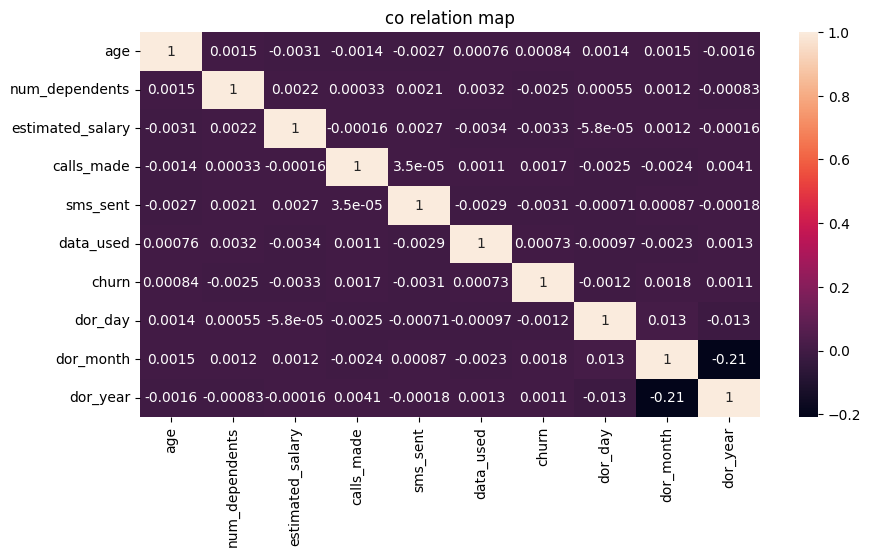

In [ ]:

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title("co relation map")
plt.show()

In [ ]:
x=dfc.drop(['churn'],axis=1)
x

,num_dependents,estimated_salary,calls_made,sms_sent,data_used,dor_day,dor_month,dor_year,telecom_partner_BSNL,telecom_partner_Reliance Jio,...,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,4,124962,44,45,-361,1,1,2020,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,130556,62,39,5973,1,1,2020,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,148828,49,24,193,1,1,2020,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,38722,80,25,9377,1,1,2020,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2,55098,78,15,1393,1,1,2020,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,3,130580,28,9,4102,3,5,2023,0,0,...,0,0,0,0,0,0,0,0,1,0
243549,0,82393,80,45,7521,3,5,2023,0,1,...,0,0,0,0,0,0,0,0,1,0
243550,4,51298,26,4,6547,3,5,2023,0,1,...,0,1,0,0,0,0,0,0,1,0
243551,2,83981,80,15,1125,3,5,2023,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y=dfc['churn']
y

0         0
1         0
2         1
3         1
4         0
         ..
243548    0
243549    0
243550    0
243551    0
243552    0
Name: churn, Length: 243553, dtype: int64

#balancing the dataset

In [ ]:
#balance the dataset and apply smote class

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x,y)




In [ ]:
y_resampled.value_counts()


0    194726
1    194726
Name: churn, dtype: int64

# **Splitting of training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.30,random_state=42)



# **Model Creation**

In [ ]:
#perform standardiztion

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

knn=KNeighborsClassifier()
nb=BernoulliNB()
tree=DecisionTreeClassifier()
rand=RandomForestClassifier()
log_reg = LogisticRegression()

lst=[knn,nb,tree,rand,log_reg]

# **Performance Evaluation**

In [ ]:
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("accuracy score",accuracy_score(y_test,y_pred))
  print("*********")
  print("confusion matrix",confusion_matrix(y_test,y_pred))
  print("*********")
  print("classification report",classification_report(y_test,y_pred))

KNeighborsClassifier()
accuracy score 0.8283662569755897
*********
confusion matrix [[52540  5924]
 [14129 44243]]
*********
classification report               precision    recall  f1-score   support

           0       0.79      0.90      0.84     58464
           1       0.88      0.76      0.82     58372

    accuracy                           0.83    116836
   macro avg       0.83      0.83      0.83    116836
weighted avg       0.83      0.83      0.83    116836

BernoulliNB()
accuracy score 0.8306686295319936
*********
confusion matrix [[53470  4994]
 [14790 43582]]
*********
classification report               precision    recall  f1-score   support

           0       0.78      0.91      0.84     58464
           1       0.90      0.75      0.82     58372

    accuracy                           0.83    116836
   macro avg       0.84      0.83      0.83    116836
weighted avg       0.84      0.83      0.83    116836

DecisionTreeClassifier()
accuracy score 0.759166695196686
***

## Conclusion


After applying smoting the accuracy of the models have improved.Here the best performing models are Random Forest Classifier and Logistic Reggresor with an accuracy of 84%.With high recall rate and fair precision score, the likelihood that our model can predict a customer churn is high.